In [147]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from pycaret.regression import *

In [148]:
data_train = pd.read_csv('.././csv/flood_train.csv')
df = pd.DataFrame(data_train)

In [149]:
df.head(5)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [152]:
df.isna().sum()
df.duplicated().sum()

0

In [153]:
data_test = pd.read_csv('.././csv/flood_test.csv')
df_test = pd.DataFrame(data_test)

In [154]:
df_test.head(5)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [155]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

In [156]:
df_test.shape

(745305, 21)

In [157]:
df.shape

(1117957, 22)

In [158]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1117957.0,558978.000000,322726.531782,0.000,279489.00,558978.000,838467.00,1117956.000
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000


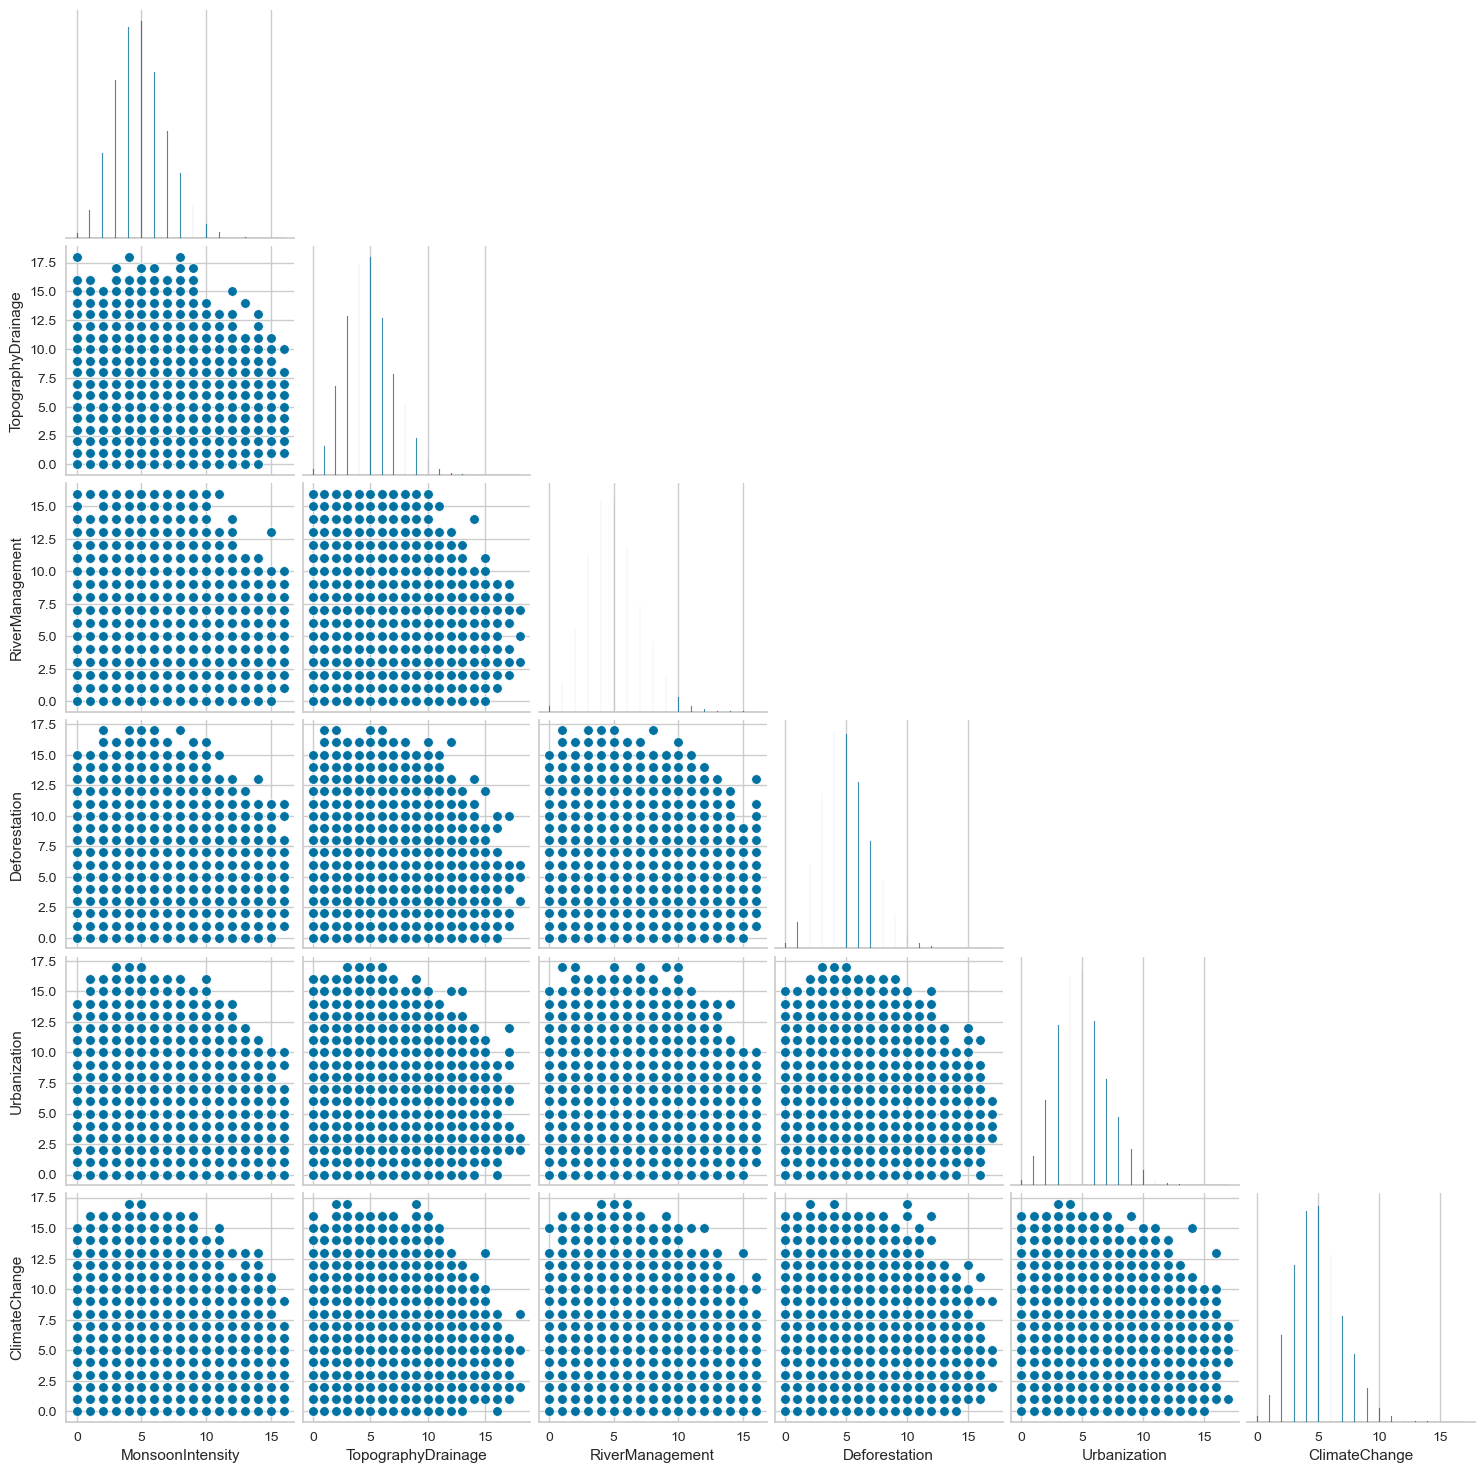

In [120]:
sns.pairplot(df.iloc[:,1:7],corner=True)

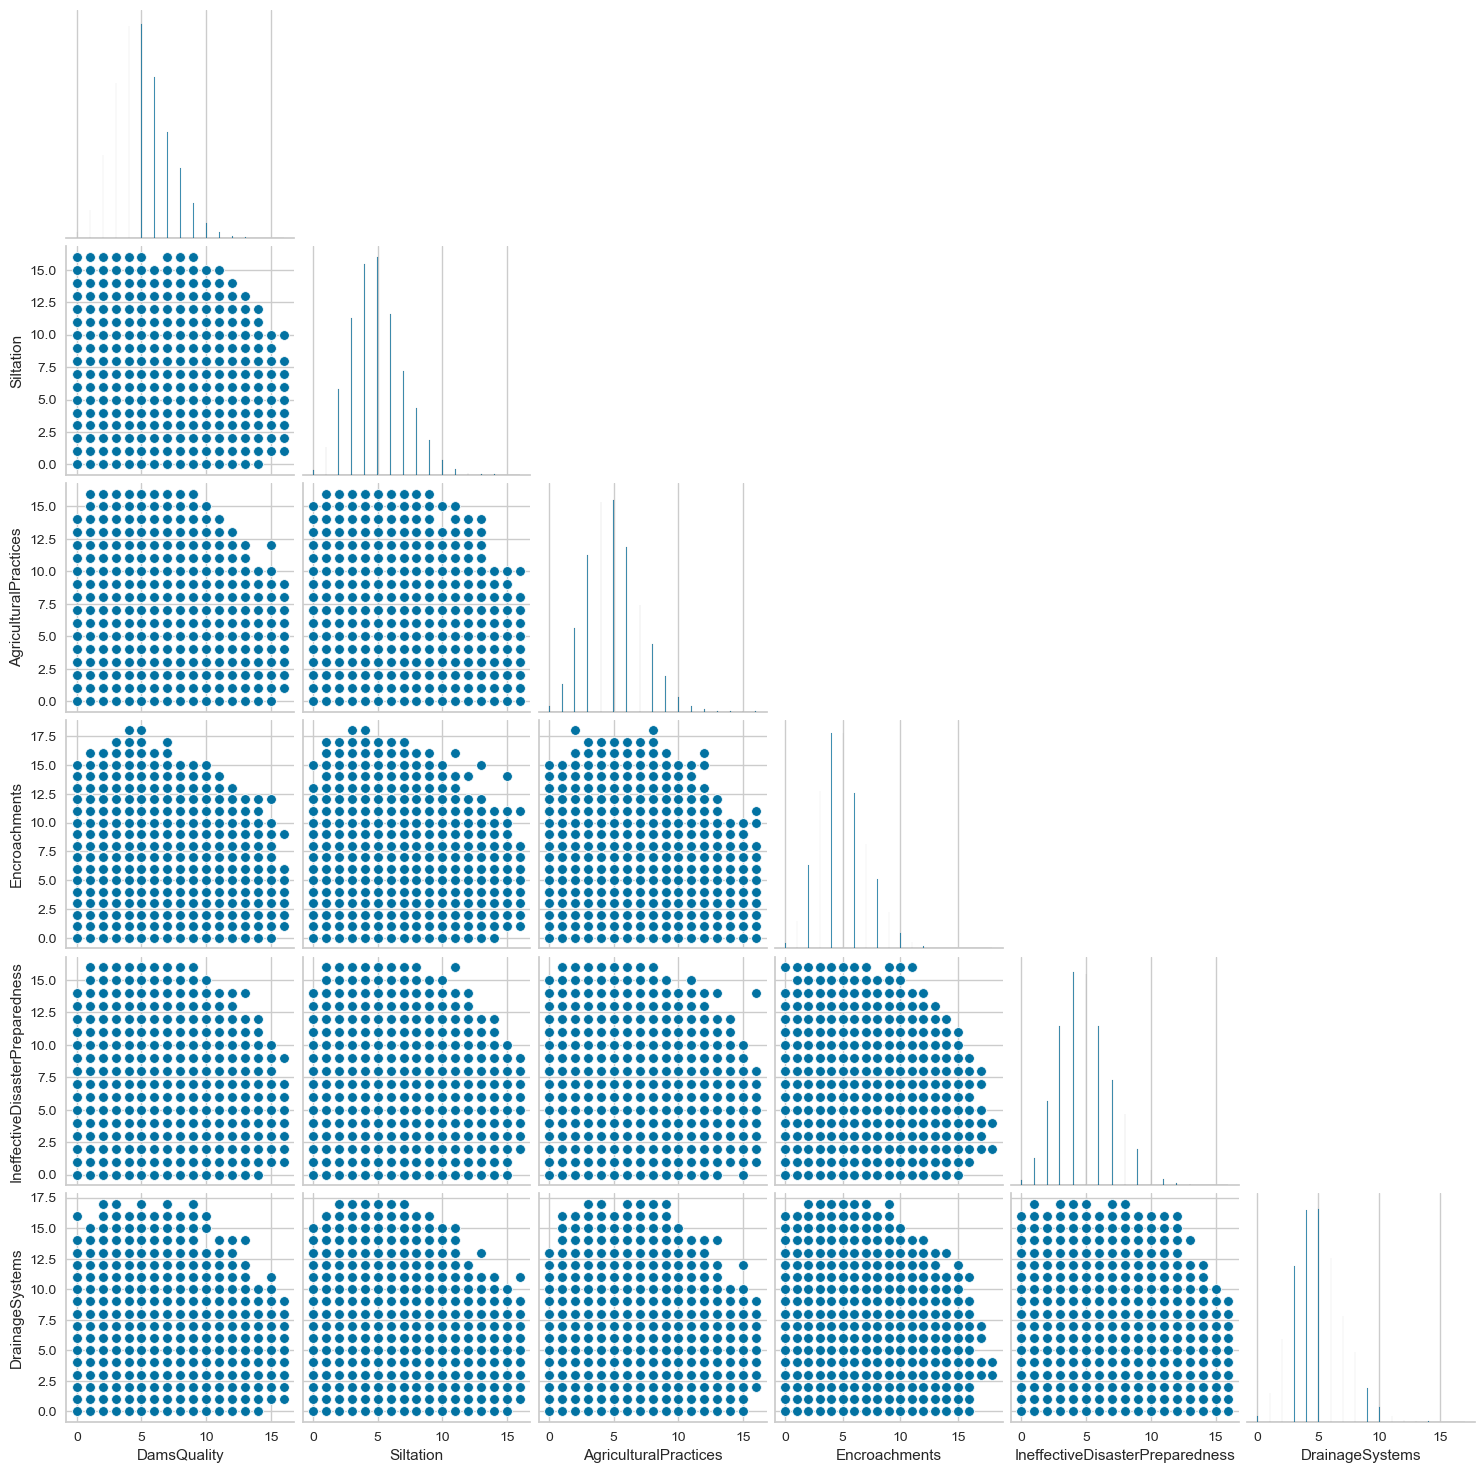

In [121]:
sns.pairplot(df.iloc[:,7:13],corner=True)

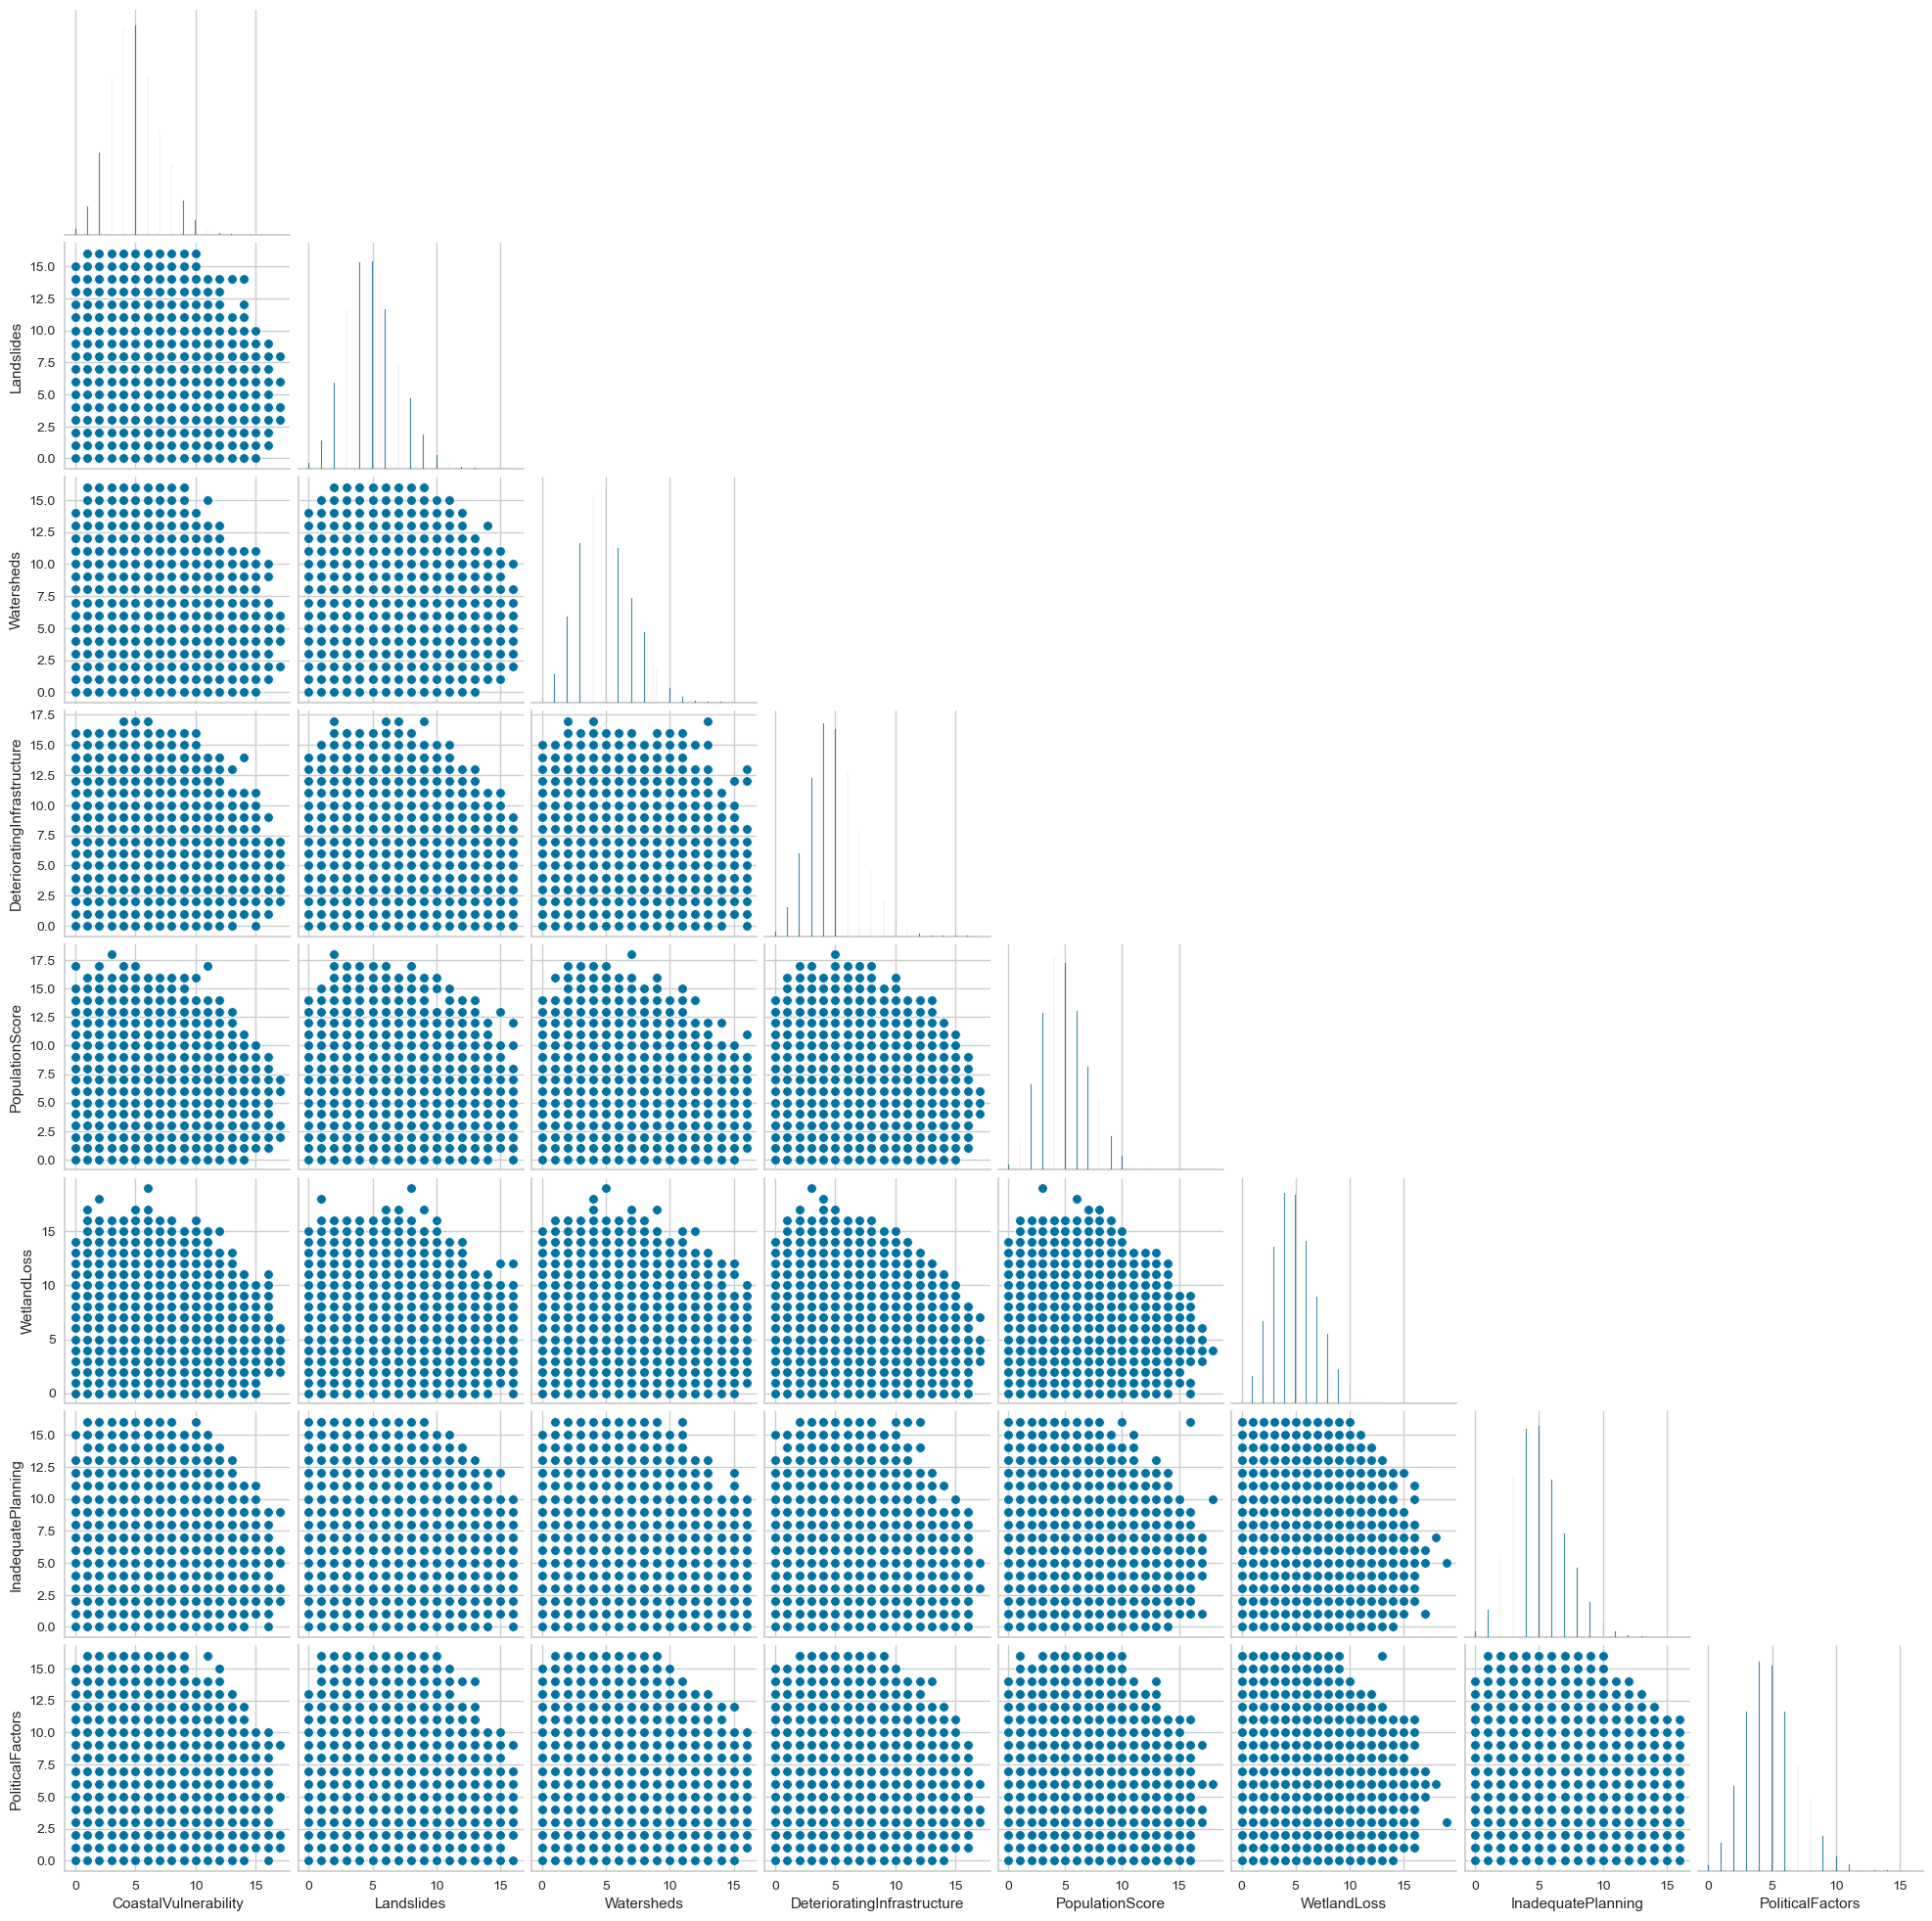

In [122]:
sns.pairplot(df.iloc[:,13:21],corner=True)

<Axes: >

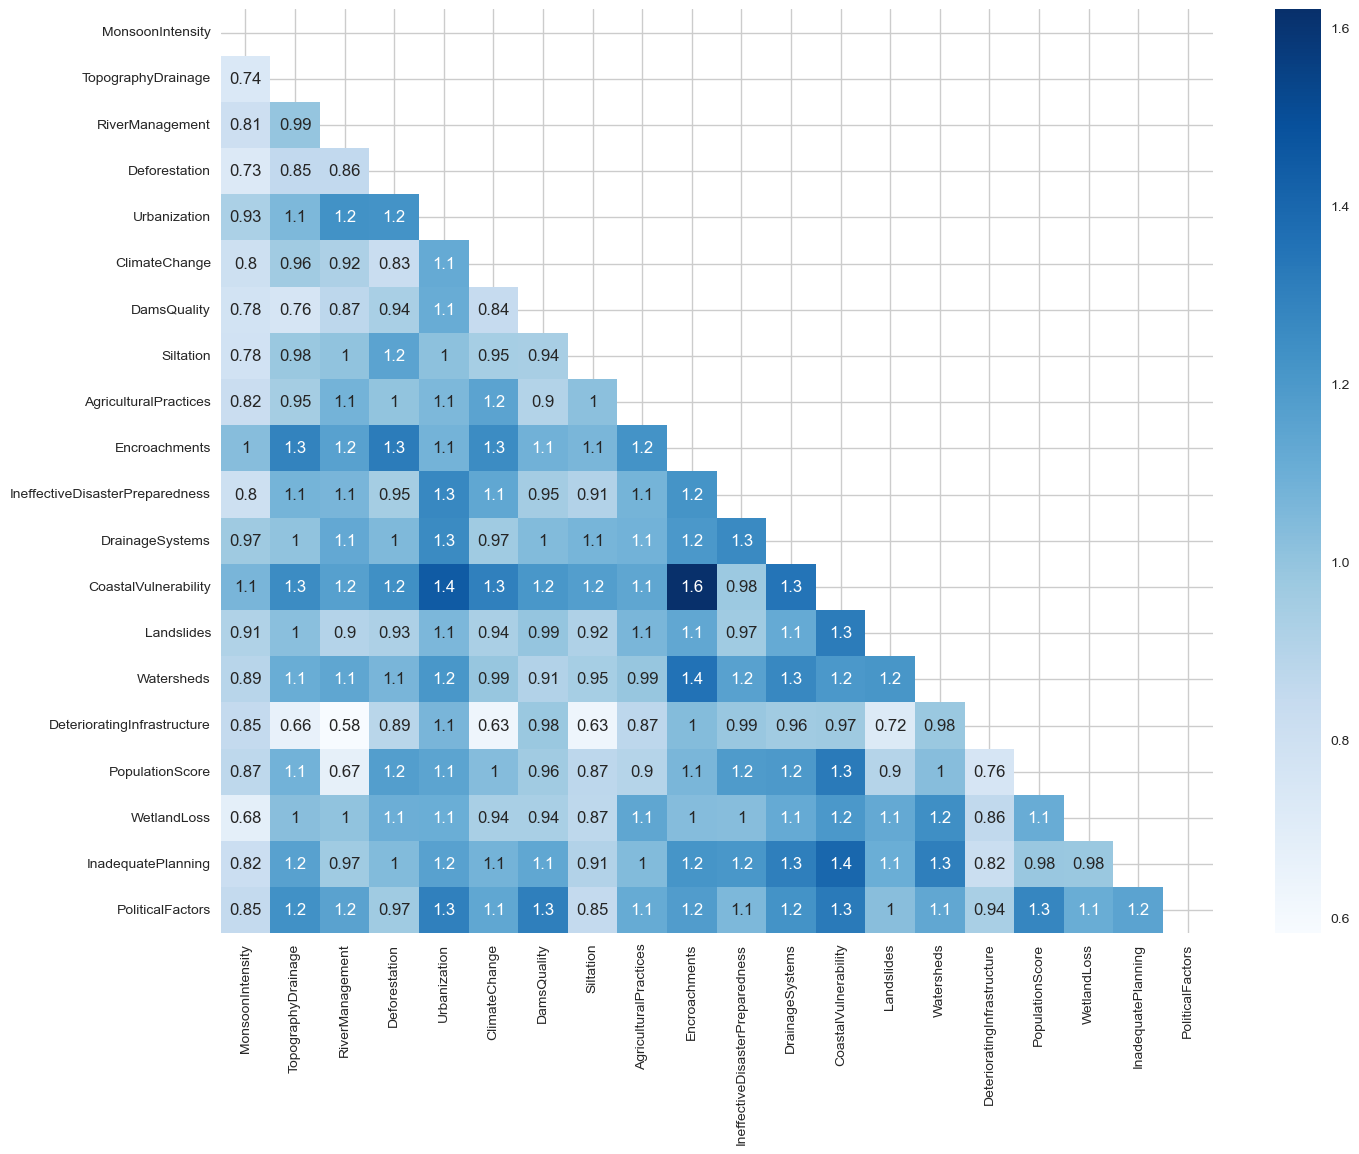

In [123]:
plt.figure(figsize=(16,12))
corr_data = df.iloc[:,1:21].corr() * 100
sns.heatmap(data=abs(corr_data),annot=True,cmap = 'Blues',mask=np.triu(corr_data))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'MonsoonIntensity'),
  Text(2, 0, 'TopographyDrainage'),
  Text(3, 0, 'RiverManagement'),
  Text(4, 0, 'Deforestation'),
  Text(5, 0, 'Urbanization'),
  Text(6, 0, 'ClimateChange'),
  Text(7, 0, 'DamsQuality'),
  Text(8, 0, 'Siltation'),
  Text(9, 0, 'AgriculturalPractices'),
  Text(10, 0, 'Encroachments'),
  Text(11, 0, 'IneffectiveDisasterPreparedness'),
  Text(12, 0, 'DrainageSystems'),
  Text(13, 0, 'CoastalVulnerability'),
  Text(14, 0, 'Landslides'),
  Text(15, 0, 'Watersheds'),
  Text(16, 0, 'DeterioratingInfrastructure'),
  Text(17, 0, 'PopulationScore'),
  Text(18, 0, 'WetlandLoss'),
  Text(19, 0, 'InadequatePlanning'),
  Text(20, 0, 'PoliticalFactors')])

<Figure size 1400x800 with 0 Axes>

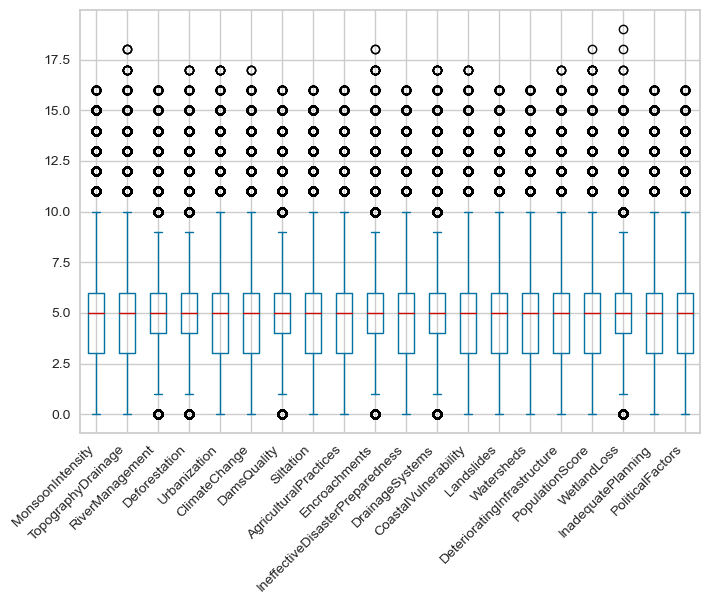

In [159]:
fig = plt.figure(figsize=(14,8))
df.iloc[:,1:21].plot(kind= 'box')
plt.xticks(rotation=45,ha='right')

In [125]:
df.iloc[:,1:21].columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

In [160]:
for col in df.iloc[:,1:21].columns:  
        q1,q3 = np.percentile(df[col],[25,75])
        iqr = q3-q1
        lf =  q1 - 1.5*iqr
        uf =  q3 + 1.5*iqr
        df[col] = np.where(df[col] < lf, lf, df[col])
        df[col] = np.where(df[col] > uf, uf, df[col])   

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'MonsoonIntensity'),
  Text(2, 0, 'TopographyDrainage'),
  Text(3, 0, 'RiverManagement'),
  Text(4, 0, 'Deforestation'),
  Text(5, 0, 'Urbanization'),
  Text(6, 0, 'ClimateChange'),
  Text(7, 0, 'DamsQuality'),
  Text(8, 0, 'Siltation'),
  Text(9, 0, 'AgriculturalPractices'),
  Text(10, 0, 'Encroachments'),
  Text(11, 0, 'IneffectiveDisasterPreparedness'),
  Text(12, 0, 'DrainageSystems'),
  Text(13, 0, 'CoastalVulnerability'),
  Text(14, 0, 'Landslides'),
  Text(15, 0, 'Watersheds'),
  Text(16, 0, 'DeterioratingInfrastructure'),
  Text(17, 0, 'PopulationScore'),
  Text(18, 0, 'WetlandLoss'),
  Text(19, 0, 'InadequatePlanning'),
  Text(20, 0, 'PoliticalFactors')])

<Figure size 1400x800 with 0 Axes>

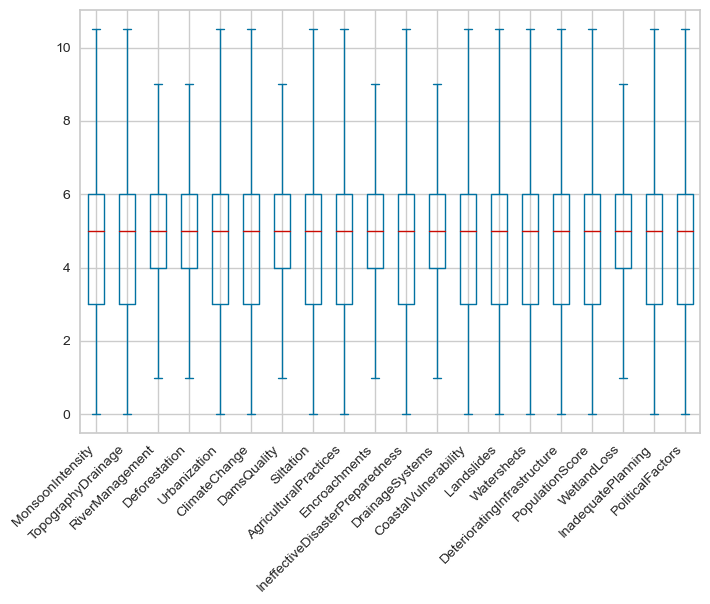

In [161]:
fig = plt.figure(figsize=(14,8))
df.iloc[:,1:21].plot(kind= 'box')
plt.xticks(rotation=45,ha='right')

In [129]:
clf_setup = setup(data=df.iloc[:,1:], target='FloodProbability')

,Description,Value
0,Session id,8499
1,Target,FloodProbability
2,Target type,Regression
3,Original data shape,"(710971, 21)"
4,Transformed data shape,"(710971, 21)"
5,Transformed train set shape,"(497679, 21)"
6,Transformed test set shape,"(213292, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [130]:
#best_model = compare_models()

In [162]:
X = df.iloc[:,1:21]
y = df['FloodProbability']
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [163]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 0.04325272,  1.49228462,  0.03751023, ...,  0.04010625,
         1.00752731, -0.93567663],
       [ 0.53658731,  1.00814964, -0.46885725, ..., -0.97476611,
        -0.45380995, -0.93567663],
       [ 0.53658731,  0.03987966,  0.54387771, ..., -1.48220229,
        -0.94092237, -0.93567663],
       ...,
       [ 1.02992189, -0.92839031,  2.06298013, ...,  0.04010625,
        -1.42803479, -0.4509057 ],
       [ 1.02992189, -0.92839031, -0.97522472, ...,  1.05497861,
         0.52041489, -0.4509057 ],
       [-0.45008186,  0.03987966,  0.54387771, ...,  1.05497861,
         1.00752731,  1.48817805]])

In [144]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [164]:
y_pred_lr = lr_model.predict(X_test)

In [165]:
print('Mean Absolute Error:', mean_absolute_error(y_test,y_pred_lr))
print('Mean Squared Error:', mean_squared_error(y_test,y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print('r2_score:', r2_score(y_test,y_pred_lr))

Mean Absolute Error: 0.01621402752617241
Mean Squared Error: 0.00042039594941962105
Root Mean Squared Error: 0.02050355943292825
r2_score: 0.8382642010887384


In [166]:
df_test.head(5)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [167]:
x_pred_lr_test = df_test.iloc[:,1:21]
y_pred_lr_test = lr_model.predict(x_pred_lr_test)

In [169]:
y_pred_lr_test

array([0.57569533, 0.45621861, 0.45648242, ..., 0.62859262, 0.55339714,
       0.51313239])

In [170]:
df_predicted = pd.DataFrame(y_pred_lr_test, columns=['FloodProbability'])
df_predicted.head()

,FloodProbability
0,0.575695
1,0.456219
2,0.456482
3,0.467342
4,0.466882


In [171]:
df_predicted.to_csv('submission.csv', index=False)